In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dirty_sample_500.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,6253,L53432,L,300.8,310.3,1538,36.1,198,0,0,0,0,0,0
1,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
2,1732,M16591,M,298.3,307.9,1485,42.0,117,0,0,0,0,0,0
3,4743,L51922,L,303.3,311.3,1592,33.7,14,0,0,0,0,0,0
4,4522,L51701,L,302.4,310.4,1865,23.9,129,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      480 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              480 non-null    float64
 7   Tool wear [min]          500 non-null    int64  
 8   Machine failure          500 non-null    int64  
 9   TWF                      500 non-null    int64  
 10  HDF                      500 non-null    int64  
 11  PWF                      500 non-null    int64  
 12  OSF                      500 non-null    int64  
 13  RNF                      500 non-null    int64  
dtypes: float64(3), int64(9), o

In [5]:
df.isna().sum()

UDI                         0
Product ID                  0
Type                        0
Air temperature [K]        20
Process temperature [K]     0
Rotational speed [rpm]      0
Torque [Nm]                20
Tool wear [min]             0
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
dtype: int64

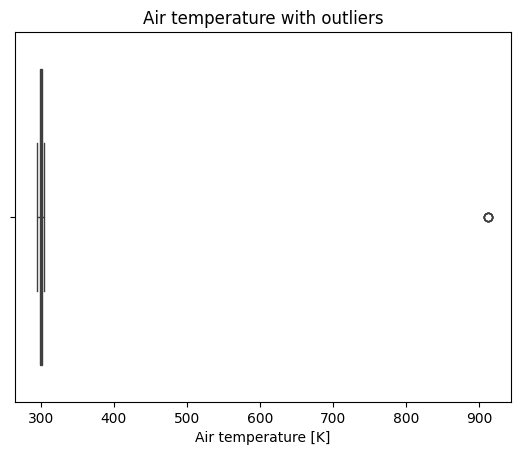

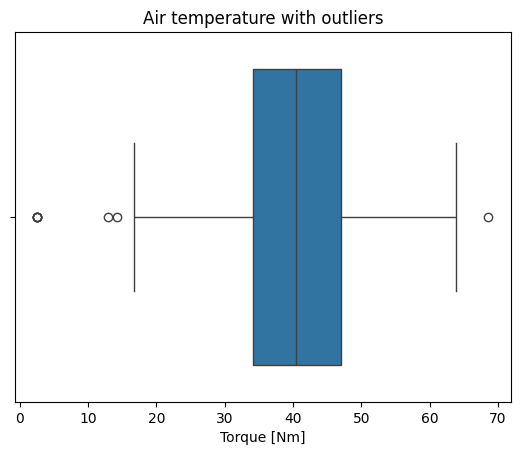

In [6]:
sns.boxplot(x=df['Air temperature [K]'])
plt.title("Air temperature with outliers")
plt.show()

sns.boxplot(x=df['Torque [Nm]'])
plt.title("Air temperature with outliers")
plt.show()


In [7]:
df['Type'].unique()

array(['L', 'M', 'H', 'L ', '??', 'h', 'm', 'HIGH'], dtype=object)

In [8]:
df['Type'].value_counts()

Type
L       320
M       133
H        42
L         1
??        1
h         1
m         1
HIGH      1
Name: count, dtype: int64

In [9]:
df['Machine failure'].value_counts()

Machine failure
0    483
1     17
Name: count, dtype: int64

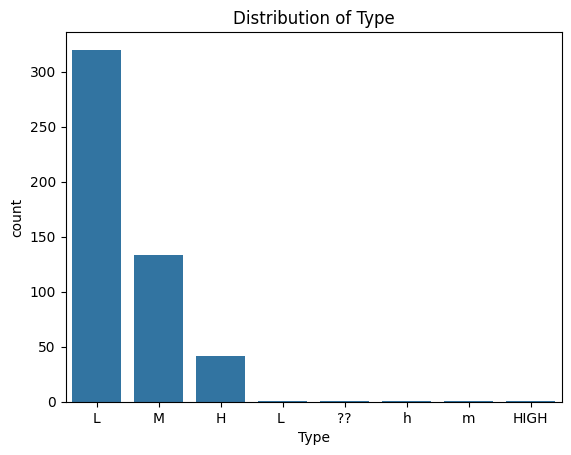

In [11]:
sns.countplot(x='Type', data=df)
plt.title('Distribution of Type')
plt.show()

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

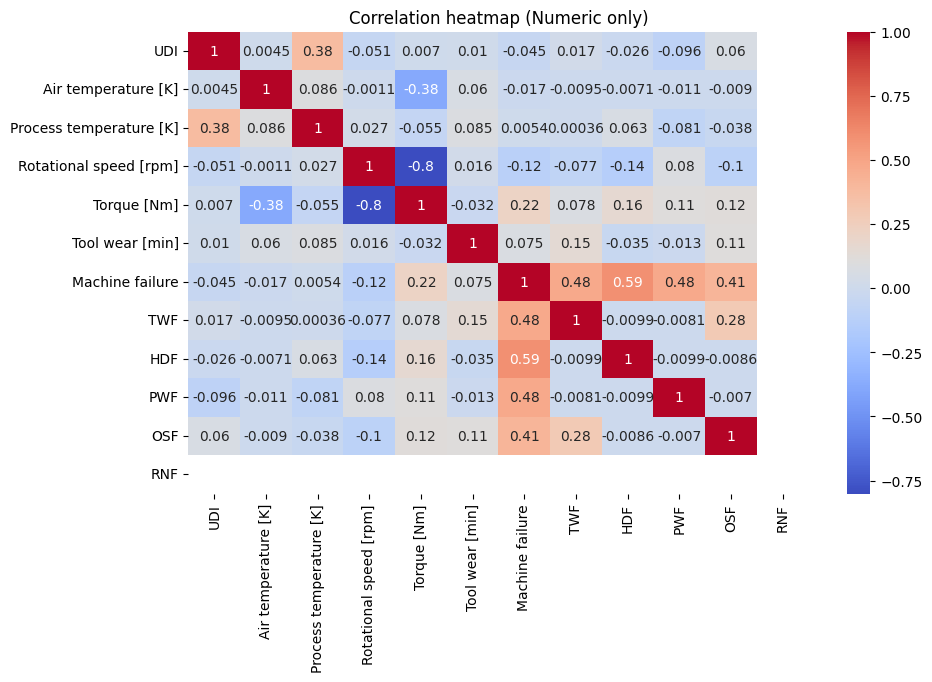

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap (Numeric only)")
plt.show()